# **Menghitung Jumlah Data**

In [5]:
import os

# Folder data
data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'

# Menghitung jumlah gambar
total_images = 0
image_extensions = ('.jpg', '.jpeg', '.png')

for root, _, files in os.walk(data):
    for file in files:
        if file.lower().endswith(image_extensions):
            total_images += 1

# Menampilkan jumlah total gambar
print(f'Total number of images: {total_images}')

Total number of images: 500
Total number of images: 500


# **Pra-pemrosesan**

## **Mengitung Dimensi Data**

In [11]:
import cv2

# Load gambar
def count_images_for_dimension(image_path, image_dimensions_count):
    image = cv2.imread(image_path)
    if image is None:
        print(f'Failed to load image: {image_path}')
    else:
        height, width, _ = image.shape
        image_dimensions_count[(height, width)] = image_dimensions_count.get((height, width), 0) + 1

# Menghitung jumlah gambar untuk setiap dimensi
image_dimensions_count = {}

for root, _, files in os.walk(data):
    for file in files:
        image_path = os.path.join(root, file)
        count_images_for_dimension(image_path, image_dimensions_count)

# Menampilkan jumlah gambar setiap dimensi
print('Number of images for each dimension:')
for dimension, count in image_dimensions_count.items():
    print(f'Dimension: {dimension}, Count: {count}')

Number of images for each dimension:
Dimension: (1920, 1899), Count: 1
Dimension: (1920, 1655), Count: 1
Dimension: (1920, 1440), Count: 144
Dimension: (1920, 1451), Count: 1
Dimension: (1920, 1654), Count: 1
Dimension: (1920, 1537), Count: 1
Dimension: (1920, 1313), Count: 2
Dimension: (1920, 1584), Count: 1
Dimension: (1920, 1716), Count: 1
Dimension: (1920, 1648), Count: 1
Dimension: (1920, 1456), Count: 2
Dimension: (1920, 1646), Count: 1
Dimension: (1920, 1633), Count: 1
Dimension: (1920, 1439), Count: 2
Dimension: (1920, 1524), Count: 2
Dimension: (1920, 1667), Count: 1
Dimension: (1920, 1425), Count: 1
Dimension: (1920, 1673), Count: 3
Dimension: (1920, 1794), Count: 1
Dimension: (1920, 1566), Count: 1
Dimension: (1920, 1636), Count: 1
Dimension: (1920, 1732), Count: 1
Dimension: (1920, 1866), Count: 1
Dimension: (1920, 1796), Count: 1
Dimension: (1920, 1449), Count: 1
Dimension: (1920, 1652), Count: 2
Dimension: (1920, 1704), Count: 2
Dimension: (1920, 1775), Count: 1
Dimension

## **Melihat Isi Dataset**

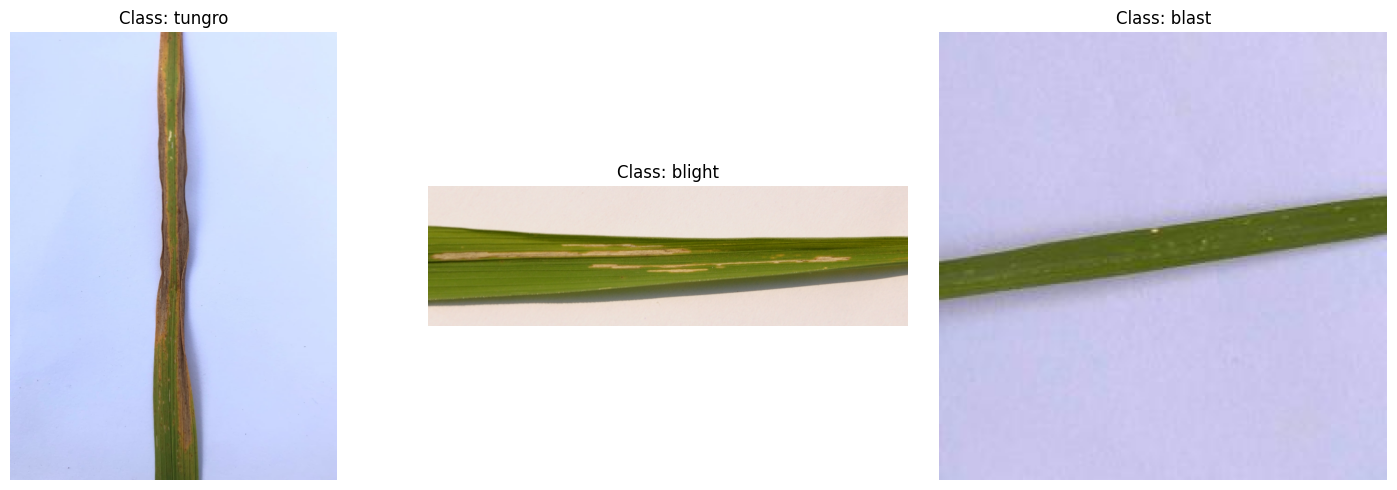

In [12]:
import random
import matplotlib.pyplot as plt

# Menjelajahi struktur direktori
image_paths = {}
for root, _, files in os.walk(data):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            class_name = os.path.basename(root)
            if class_name not in image_paths:
                image_paths[class_name] = []
            image_paths[class_name].append(os.path.join(root, file))

# Menampilkan gambar dan nama kelas
def display_image_with_class(ax, image_path, class_name):
    image = cv2.imread(image_path)
    if image is None:
        print(f'Failed to load image: {image_path}')
    else:
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(f'Class: {class_name}')

# Menampilkan gambar secara acak per kelas
num_classes = len(image_paths)
fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))

for i, (class_name, paths) in enumerate(image_paths.items()):
    random_image_path = random.choice(paths)
    display_image_with_class(axs[i], random_image_path, class_name)

plt.tight_layout()
plt.show()

# **Konversi Citra ke Grayscale**
Konversi citra berwarna (RGB) menjadi citra hitam-putih (grayscale), yaitu citra yang hanya memiliki 1 channel intensitas (abu-abu) dibandingkan 3 channel warna (merah, hijau, biru).

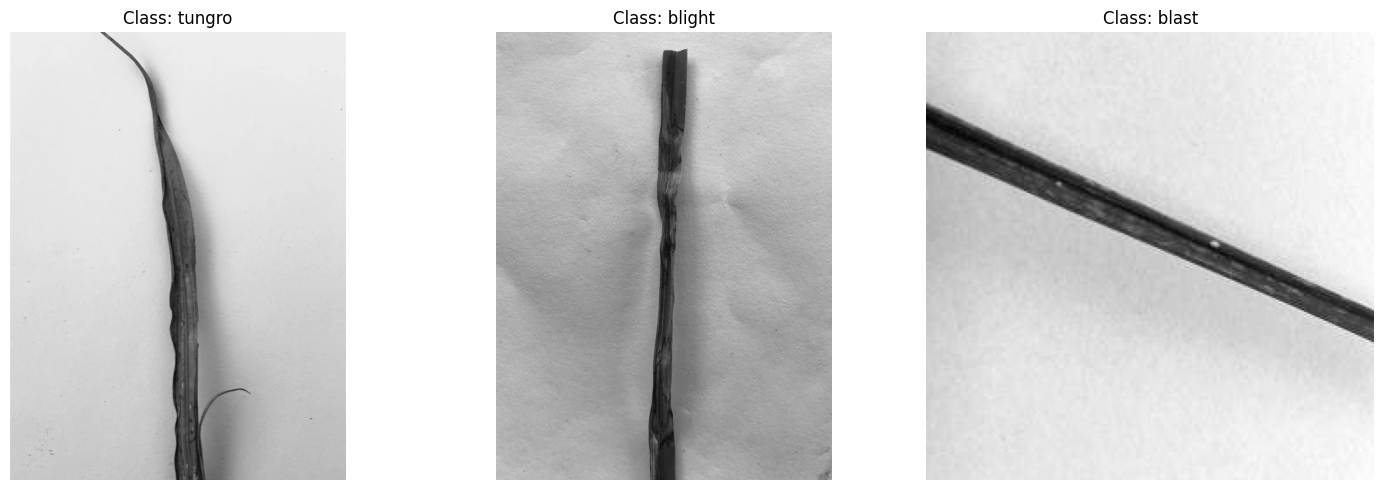

In [13]:
# Menampilkan gambar secara acak per kelas dengan konversi grayscale
num_classes = len(image_paths)
fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))

for i, (class_name, paths) in enumerate(image_paths.items()):
    random_image_path = random.choice(paths)
    image = cv2.imread(random_image_path)
    if image is None:
        print(f'Failed to load image: {random_image_path}')
    else:
      # Convert to grayscale
      gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      axs[i].imshow(gray_image, cmap='gray') # Display with grayscale colormap
      axs[i].axis('off')
      axs[i].set_title(f'Class: {class_name}')

plt.tight_layout()
plt.show()


# **Resize Citra ke 224 x 224**
Mengubah ukuran citra menjadi dimensi tetap yaitu 224 piksel lebar × 224 piksel tinggi.

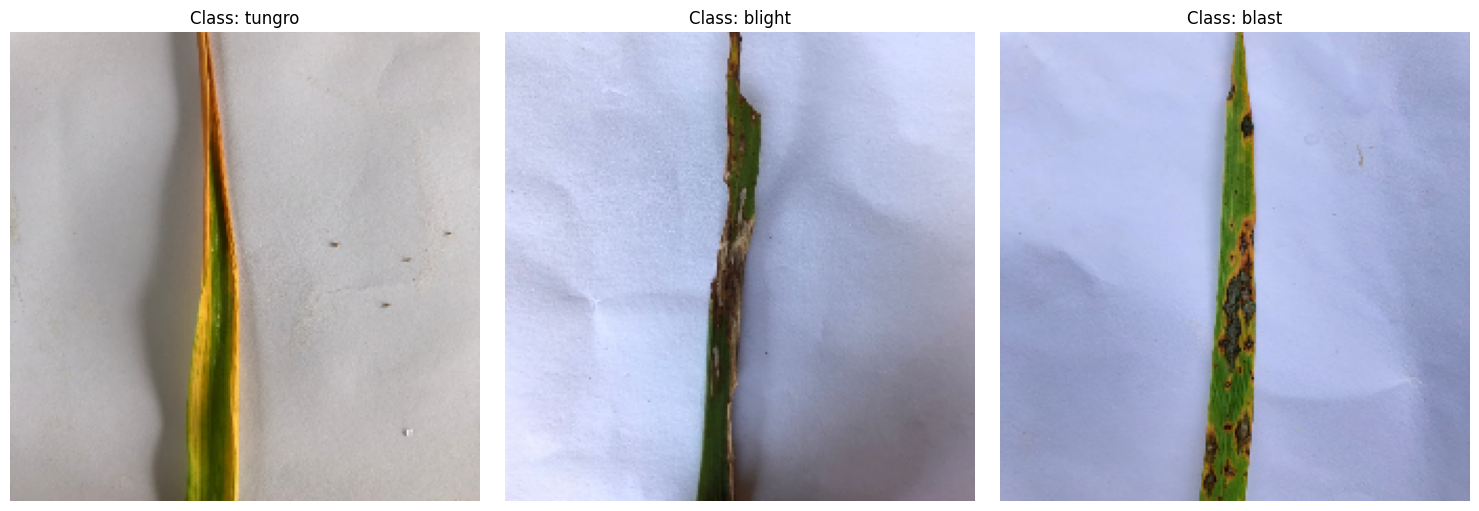

In [15]:
# Menampilkan gambar secara acak per kelas dengan resize dan tanpa grayscale
num_classes = len(image_paths)
fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))

for i, (class_name, paths) in enumerate(image_paths.items()):
    random_image_path = random.choice(paths)
    image = cv2.imread(random_image_path)
    if image is None:
        print(f'Failed to load image: {random_image_path}')
    else:
        # Resize image to 224x224
        resized_image = cv2.resize(image, (224, 224))
        axs[i].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
        axs[i].set_title(f'Class: {class_name}')

plt.tight_layout()
plt.show()


In [44]:
!pip install scikit-image

[tungro] Feature descriptor (first 10): [0.25649898 0.26070416 0.2686818  0.10428167 0.2686818  0.05214083
 0.13190703 0.         0.         0.2686818 ]
[blight] Feature descriptor (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[blast] Feature descriptor (first 10): [0.21239131 0.         0.         0.         0.29734784 0.
 0.         0.         0.         0.32361634]


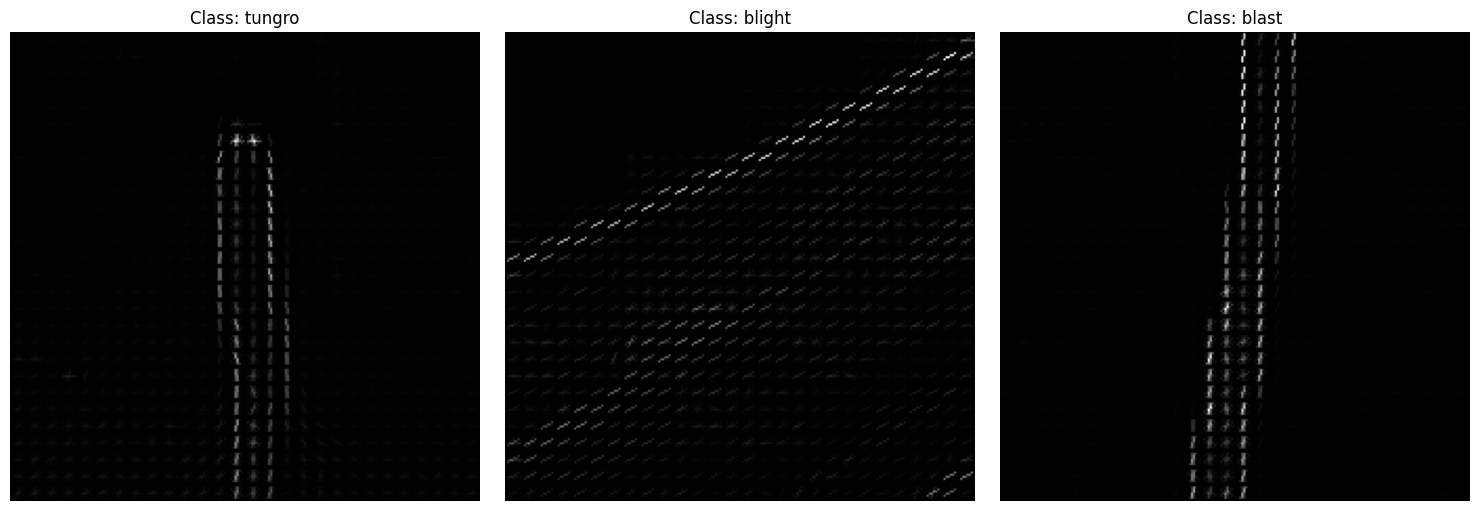

In [45]:
# Ambil semua folder class di dalam direktori data
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar dan fitur HOG-nya
plt.figure(figsize=(15, 5))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

    # Ekstraksi HOG
    fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, channel_axis=None)

    plt.subplot(1, len(selected_images), i + 1)
    plt.imshow(hog_image, cmap='gray')
    plt.title(f'Class: {class_name}')
    plt.axis('off')

    print(f"[{class_name}] Feature descriptor (first 10): {fd[:10]}")

plt.tight_layout()
plt.show()

# **Contrast**
Mengukur intensitas kontras atau perbedaan lokal dalam gambar.

→ Nilai tinggi menunjukkan perbedaan besar antara piksel bersebelahan (tekstur kasar).

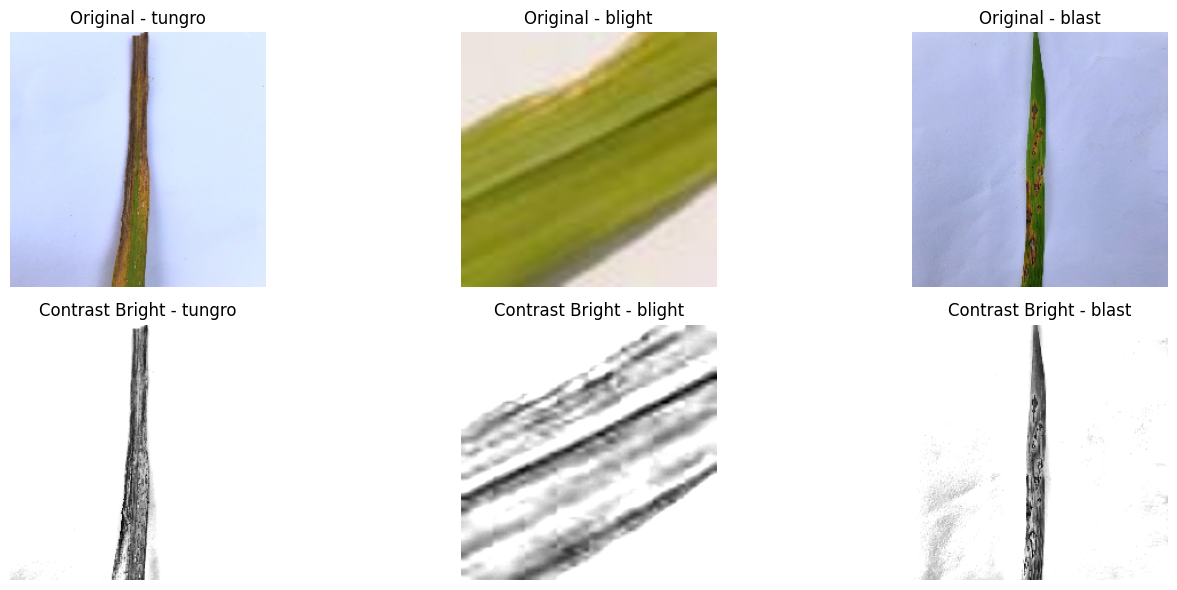

In [47]:
# Ambil semua folder class di dalam direktori data
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar asli (berwarna) dan versi kontras cerah
plt.figure(figsize=(15, 6))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale untuk kontras
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))  # Mengatur clipLimit lebih tinggi untuk kontras cerah
    contrast_img = clahe.apply(gray)

    # Meningkatkan kecerahan kontras cerah
    contrast_bright_img = cv2.convertScaleAbs(contrast_img, alpha=1.3, beta=50)  # Penambahan alpha dan beta untuk kecerahan

    # Gambar asli (berwarna)
    plt.subplot(2, len(selected_images), i + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original - {class_name}')
    plt.axis('off')

    # Gambar hasil peningkatan kontras cerah
    plt.subplot(2, len(selected_images), i + 1 + len(selected_images))
    plt.imshow(contrast_bright_img, cmap='gray')
    plt.title(f'Contrast Bright - {class_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Dissimilarity**

Menilai perbedaan absolut antar pasangan piksel.

→ Mirip dengan contrast, tetapi lebih sensitif terhadap perbedaan kecil. Nilai tinggi = lebih tidak mirip.

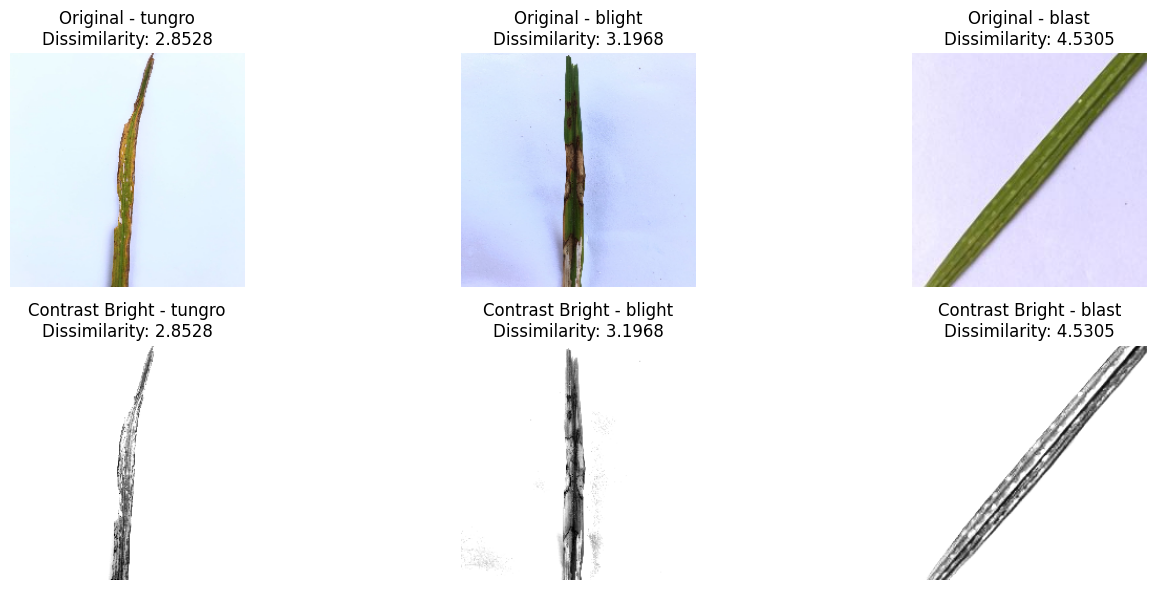

In [57]:
# Ambil semua folder class di dalam direktori data
import cv2
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'  # Ganti ini dengan path yang sesuai
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar asli (berwarna) dan versi kontras cerah, serta Dissimilarity
plt.figure(figsize=(15, 6))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale untuk kontras dan perhitungan Dissimilarity
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    contrast_img = clahe.apply(gray)
    contrast_bright_img = cv2.convertScaleAbs(contrast_img, alpha=1.3, beta=50)

    # Hitung GLCM dan Dissimilarity
    glcm = graycomatrix(contrast_bright_img, [1], [0], symmetric=True, normed=True)
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]

    # Gambar asli
    plt.subplot(2, len(selected_images), i + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original - {class_name}\nDissimilarity: {dissimilarity:.4f}')
    plt.axis('off')

    # Gambar kontras cerah
    plt.subplot(2, len(selected_images), i + 1 + len(selected_images))
    plt.imshow(contrast_bright_img, cmap='gray')
    plt.title(f'Contrast Bright - {class_name}\nDissimilarity: {dissimilarity:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Homogeneity**

Mengukur seberapa seragam tekstur dalam gambar.

→ Nilai tinggi menunjukkan tekstur halus atau area dengan sedikit perubahan intensitas.

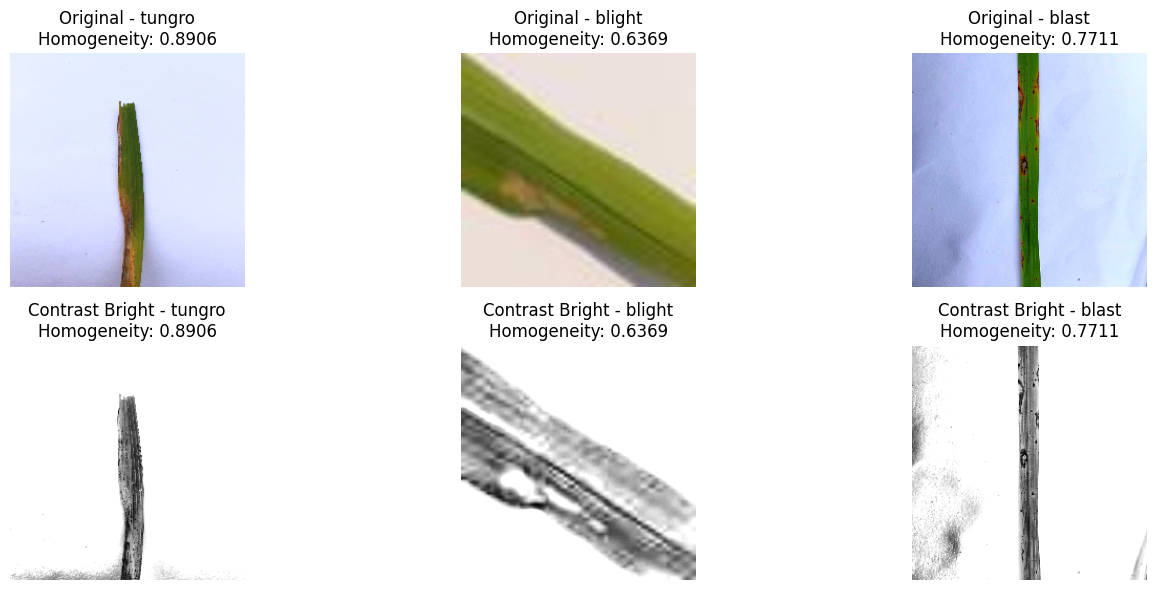

In [56]:
# Ambil semua folder class di dalam direktori data
import cv2
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'  # Ganti ini dengan path yang sesuai
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar asli (berwarna) dan versi kontras cerah, serta Homogeneity
plt.figure(figsize=(15, 6))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale untuk kontras dan perhitungan Homogeneity
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    contrast_img = clahe.apply(gray)
    contrast_bright_img = cv2.convertScaleAbs(contrast_img, alpha=1.3, beta=50)

    # Hitung GLCM dan Homogeneity
    glcm = graycomatrix(contrast_bright_img, [1], [0], symmetric=True, normed=True)
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

    # Gambar asli
    plt.subplot(2, len(selected_images), i + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original - {class_name}\nHomogeneity: {homogeneity:.4f}')
    plt.axis('off')

    # Gambar kontras cerah
    plt.subplot(2, len(selected_images), i + 1 + len(selected_images))
    plt.imshow(contrast_bright_img, cmap='gray')
    plt.title(f'Contrast Bright - {class_name}\nHomogeneity: {homogeneity:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Energy**
Juga disebut uniformity; menunjukkan keteraturan atau keseragaman dalam tekstur.

→ Nilai tinggi berarti sedikit variasi (tekstur sangat konsisten).

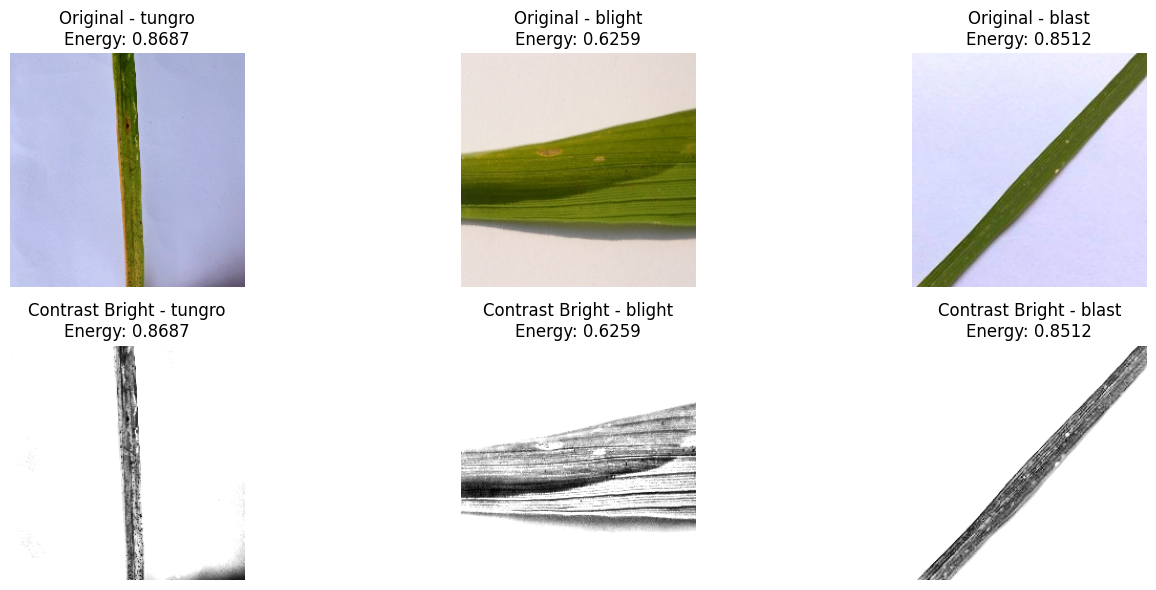

In [59]:
# Ambil semua folder class di dalam direktori data
import cv2
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'  # Ganti ini dengan path yang sesuai
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar asli (berwarna) dan versi kontras cerah, serta Energy
plt.figure(figsize=(15, 6))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale untuk kontras dan perhitungan Energy
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    contrast_img = clahe.apply(gray)
    contrast_bright_img = cv2.convertScaleAbs(contrast_img, alpha=1.3, beta=50)

    # Hitung GLCM dan Energy
    glcm = graycomatrix(contrast_bright_img, [1], [0], symmetric=True, normed=True)
    energy = graycoprops(glcm, 'energy')[0, 0]

    # Gambar asli
    plt.subplot(2, len(selected_images), i + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original - {class_name}\nEnergy: {energy:.4f}')
    plt.axis('off')

    # Gambar kontras cerah
    plt.subplot(2, len(selected_images), i + 1 + len(selected_images))
    plt.imshow(contrast_bright_img, cmap='gray')
    plt.title(f'Contrast Bright - {class_name}\nEnergy: {energy:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Correlation**
Mengukur hubungan linier antara piksel berpasangan.

→ Nilai tinggi menunjukkan pola atau struktur yang berulang secara linier.

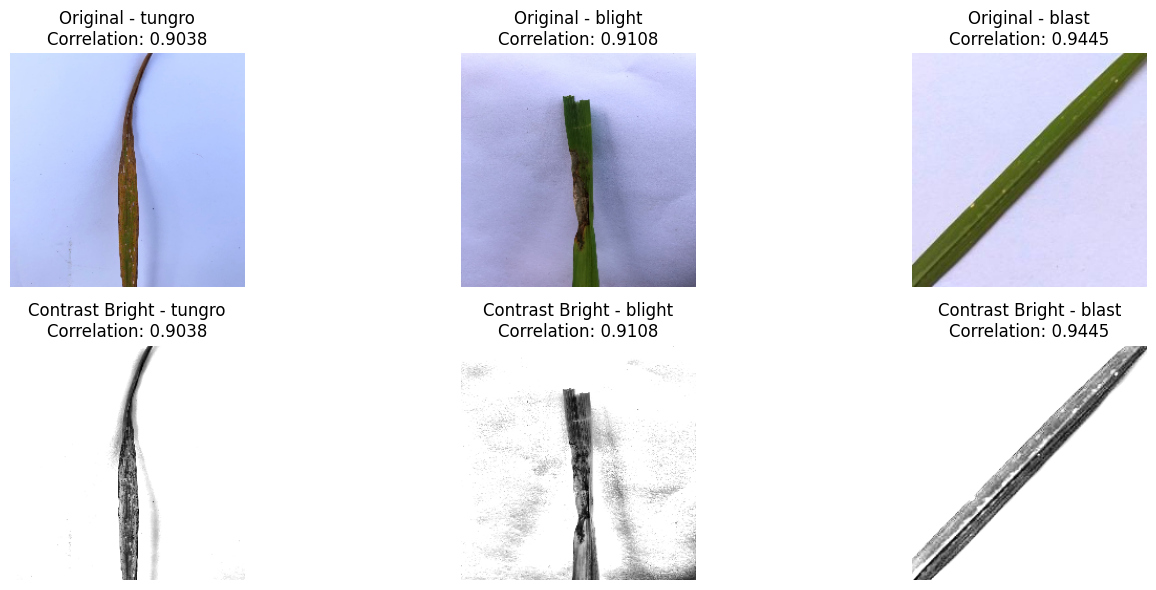

In [58]:
# Ambil semua folder class di dalam direktori data
import cv2
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'  # Ganti ini dengan path yang sesuai
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar asli (berwarna) dan versi kontras cerah, serta Correlation
plt.figure(figsize=(15, 6))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale untuk kontras dan perhitungan Correlation
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    contrast_img = clahe.apply(gray)
    contrast_bright_img = cv2.convertScaleAbs(contrast_img, alpha=1.3, beta=50)

    # Hitung GLCM dan Correlation
    glcm = graycomatrix(contrast_bright_img, [1], [0], symmetric=True, normed=True)
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    # Gambar asli
    plt.subplot(2, len(selected_images), i + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original - {class_name}\nCorrelation: {correlation:.4f}')
    plt.axis('off')

    # Gambar kontras cerah
    plt.subplot(2, len(selected_images), i + 1 + len(selected_images))
    plt.imshow(contrast_bright_img, cmap='gray')
    plt.title(f'Contrast Bright - {class_name}\nCorrelation: {correlation:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **ASM (Angular Second Moment)**
Ukuran keseragaman energi dalam GLCM (kuadrat dari setiap elemen, dijumlahkan).

→ Nilai tinggi menunjukkan tekstur yang sangat teratur dan homogen.

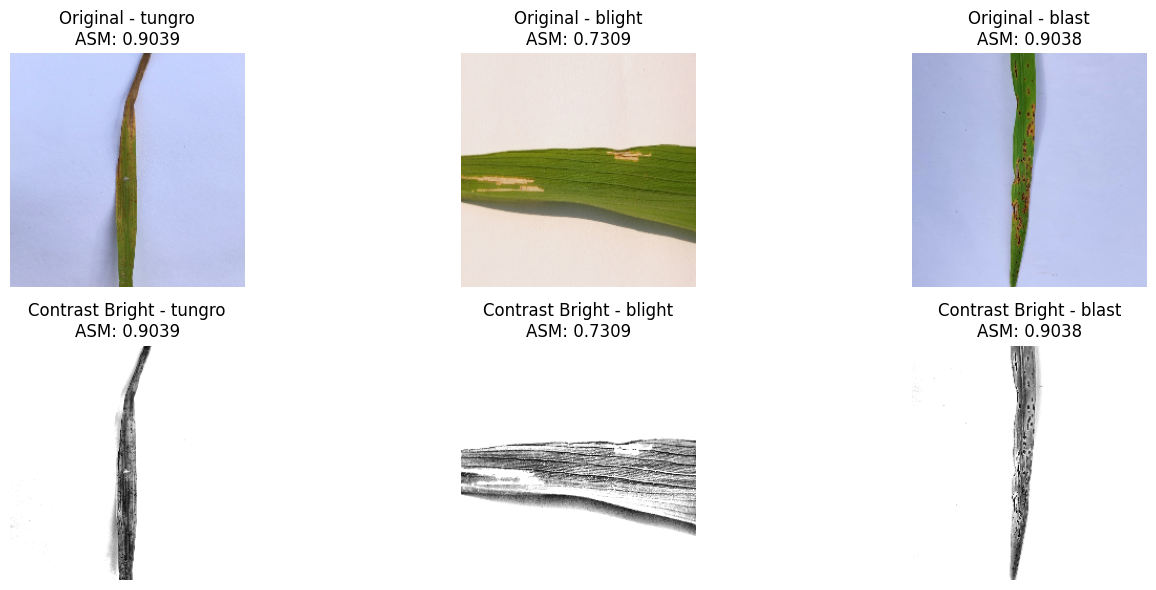

In [60]:
# Ambil semua folder class di dalam direktori data
import cv2
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'  # Ganti ini dengan path yang sesuai
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

# Tampilkan gambar asli (berwarna) dan versi kontras cerah, serta ASM
plt.figure(figsize=(15, 6))
for i, (class_name, img_path) in enumerate(selected_images):
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale untuk kontras dan perhitungan ASM
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    contrast_img = clahe.apply(gray)
    contrast_bright_img = cv2.convertScaleAbs(contrast_img, alpha=1.3, beta=50)

    # Hitung GLCM dan ASM (menggunakan 'energy' karena skimage tidak punya 'ASM' eksplisit)
    glcm = graycomatrix(contrast_bright_img, [1], [0], symmetric=True, normed=True)
    asm = graycoprops(glcm, 'energy')[0, 0]  # 'energy' adalah nilai ASM

    # Gambar asli
    plt.subplot(2, len(selected_images), i + 1)
    plt.imshow(rgb_img)
    plt.title(f'Original - {class_name}\nASM: {asm:.4f}')
    plt.axis('off')

    # Gambar kontras cerah
    plt.subplot(2, len(selected_images), i + 1 + len(selected_images))
    plt.imshow(contrast_bright_img, cmap='gray')
    plt.title(f'Contrast Bright - {class_name}\nASM: {asm:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

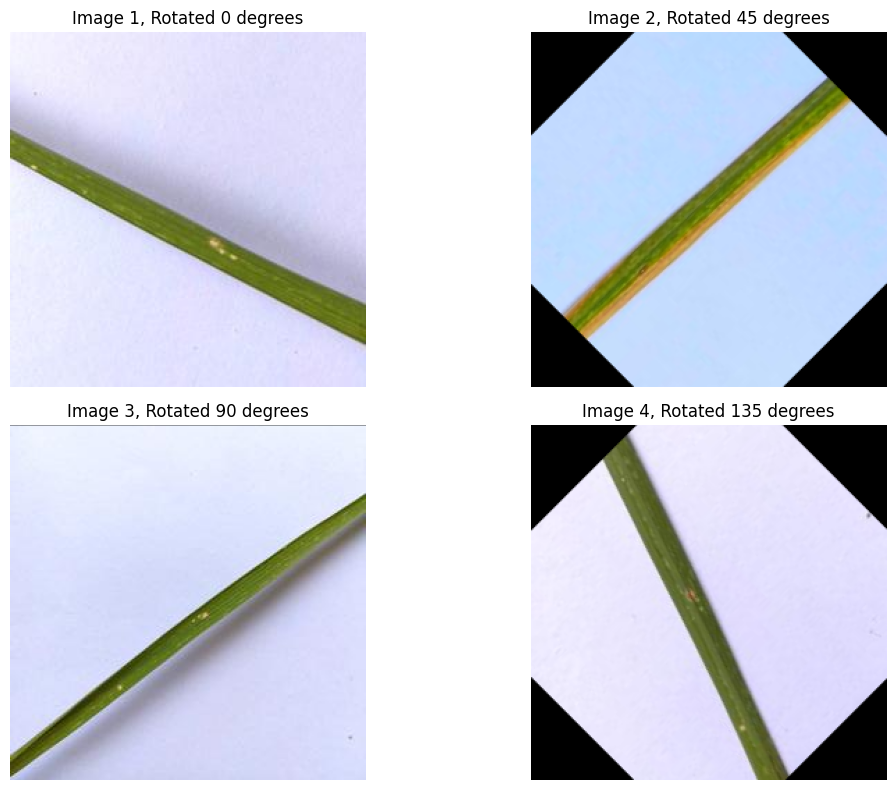

In [72]:
# Limit to 4 images or less if fewer images exist
num_images_to_process = min(4, len(image_files))

angles = [0, 45, 90, 135]

plt.figure(figsize=(12, 8))

for i in range(num_images_to_process):
    # Assuming 'image_files' contains file names without paths,
    # we need to construct the full path using 'class_path'
    img_path = os.path.join(class_path, image_files[i])  # Assuming class_path is accessible here
    img = cv2.imread(img_path)

    # Check if image loading was successful
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue  # Skip to the next image

    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angles[i], 1)
    rotated_img = cv2.warpAffine(img, M, (cols, rows))

    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}, Rotated {angles[i]} degrees')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
# Ambil semua folder class di dalam direktori data
import cv2
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

data = '/content/drive/MyDrive/TUGAS CITRA/Citra Daun Padi'  # Ganti ini dengan path yang sesuai
class_dirs = [d for d in os.listdir(data) if os.path.isdir(os.path.join(data, d))]

# Simpan satu gambar dari setiap class
selected_images = []  # Define selected_images here

for class_dir in class_dirs:
    class_path = os.path.join(data, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if image_files:
        selected_image = random.choice(image_files)
        selected_images.append((class_dir, os.path.join(class_path, selected_image)))

In [4]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

# Buat DataFrame dan simpan ke CSV
df = pd.DataFrame(all_features)
csv_output_path = '/content/drive/MyDrive/TUGAS CITRA/glcm_fitur_output.csv'
df.to_csv(csv_output_path, index=False)

print(f"Hasil fitur GLCM disimpan ke: {csv_output_path}")

Hasil fitur GLCM disimpan ke: /content/drive/MyDrive/TUGAS CITRA/glcm_fitur_output.csv
